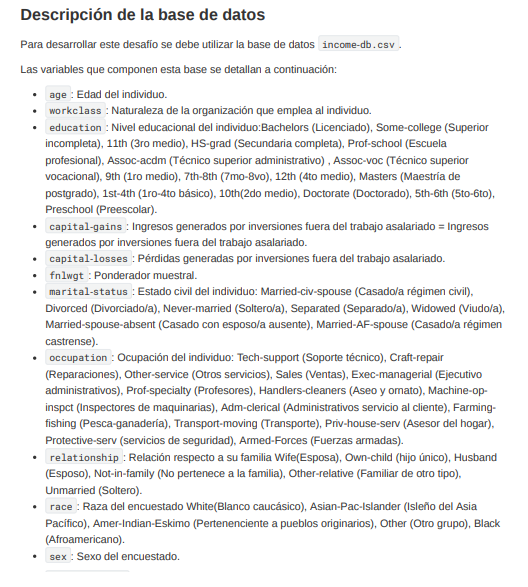

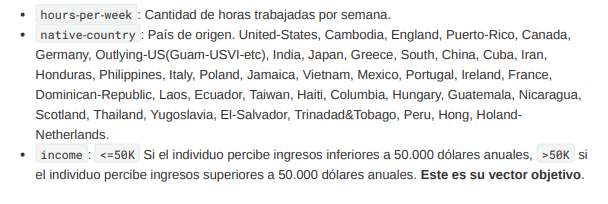

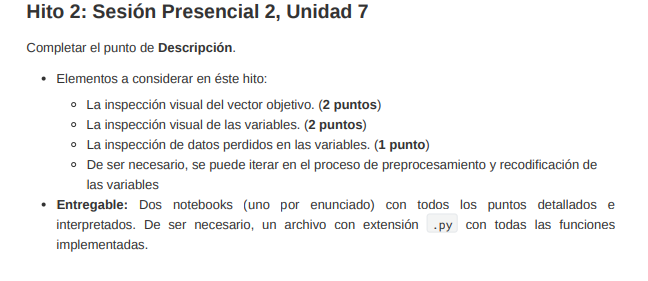

In [1]:
# Librería de análisis
import numpy as np
import pandas as pd

# Librería para estética del notebook
import warnings

warnings.filterwarnings("ignore")

# Estas librerías son para graficar
import missingno as msgn
import matplotlib.pyplot as plt
import seaborn as sns

# Estas librerías son para hacer el modelo descriptivo
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from typing import List, Dict

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("income-db.csv")

#### Análisis exploratoria de valores de las variables.

In [3]:
print(f"El dataset contiene ${df.shape[0]} filas y ${df.shape[1]} columndas")

El dataset contiene $48842 filas y $15 columndas


In [4]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Renombramos el nombre de las columnas/observaciones.
Debido a que las columnas contienen guiones medios dificiles de manejar, entonces los remplazamos por guiones bajos siguiendo el standar mas información dejo link a referencia:
[PEP8](https://www.python.org/dev/peps/pep-0008/)

In [6]:
for column in df.columns:
    if "-" in column:
        new_name = column.replace("-", "_")
        df.rename(columns={column: new_name}, inplace=True)

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
### Limpiamos data

In [9]:
def limpiar_data(df, lost_values="?"):
    """
    Reemplaza un string por nan de numpy.
    Parameters
    ----------
    df: DataFrame al que se le quiere reemplazar el lost_values por nan.
    lost_values: Valor que será reemplazado.
    Returns
    -------
    DataFrame
    """
    return df.replace(lost_values, np.nan)

In [10]:
df = limpiar_data(df)

In [11]:
df

age     workclass  fnlwgt     education  educational_num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18           NaN  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital_status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                NaN    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

#### Visualizar valores unicos por columna

In [12]:
for i in df.columns:
    print(f"Columna {i}: {df[i].unique()} \n")

Columna age: [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

Columna workclass: ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Columna fnlwgt: [226802  89814 336951 ... 129912 255835 257302] 

Columna education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

Columna educational_num: [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

Columna marital_status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

Columna occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-cleric

#### Visualizar tipos de datos por columna

In [13]:
for i in df.columns:
    print(f"Columna {i}: {df[i].describe()} \n")

Columna age: count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64 

Columna workclass: count       46043
unique          8
top       Private
freq        33906
Name: workclass, dtype: object 

Columna fnlwgt: count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64 

Columna education: count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object 

Columna educational_num: count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational_num, dtype: float64 

Columna marital_status: count                  48842
unique            

#### Recodificaciones

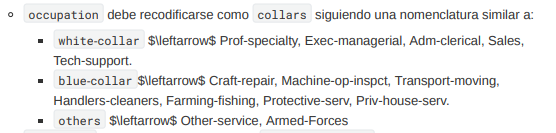

In [48]:
df["collars"] = df["occupation"].replace(
    [
        "Prof-specialty",
        "Exec-managerial",
        "Adm-clerical",
        "Sales",
        "Tech-support",
        "Craft-repair",
        "Machine-op-inspct",
        "Transport-moving",
        "Handlers-cleaners",
        "Farming-fishing",
        "Protective-serv",
        "Priv-house-serv",
        "Other-service",
        "Armed-Forces",
    ],
    [
        "white-collar",
        "white-collar",
        "white-collar",
        "white-collar",
        "white-collar",
        "blue-collar",
        "blue-collar",
        "blue-collar",
        "blue-collar",
        "blue-collar",
        "blue-collar",
        "blue-collar",
        "others",
        "others",
    ],
)
df = df.drop(["occupation"],axis= 1)

KeyError: 'occupation'

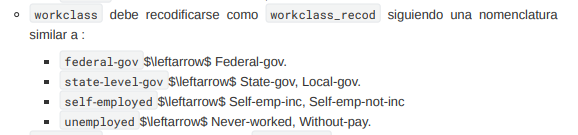

In [15]:
df["workclass_recod"] = df["workclass"].replace(
    [
        "Federal-gov",
        "State-gov",
        "Local-gov",
        "Self-emp-inc",
        "Self-emp-not-inc",
        "Never-worked",
        "Without-pay",
    ],
    [
        "federal-gov",
        "state-level-gov",
        "state-level-gov",
        "self-employed",
        "self-employed",
        "unemployed",
        "unemployed",
    ],
)
df = df.drop("workclass", 1)

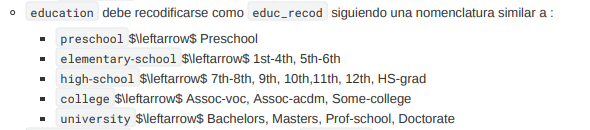

In [16]:
df["educ_recod"] = df["education"].replace(
    [
        "Preschool",
        "1st-4th",
        "5th-6th",
        "7th-8th",
        "9th",
        "10th",
        "11th",
        "12th",
        "HS-grad",
        "Assoc-voc",
        "Assoc-acdm",
        "Assoc-voc",
        "Bachelors",
        "Masters",
        "Prof-school",
        "Doctorate",
    ],
    [
        "preschool",
        "elementary-school",
        "elementary-school",
        "high-school",
        "high-school",
        "high-school",
        "high-school",
        "high-school",
        "high-school",
        "college",
        "college",
        "college",
        "university",
        "university",
        "university",
        "university",
    ],
)
# Clean unused column
df = df.drop("education", 1)

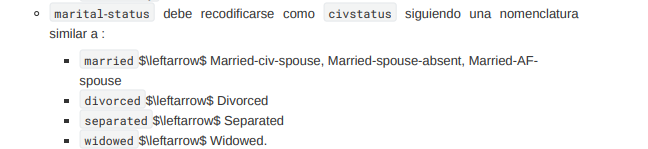

In [17]:
df["civstatus"] = df["marital_status"].replace(
    [
        "Never-married",
        "Married-civ-spouse",
        "Married-spouse-absent",
        "Married-AF-spouse",
        "Divorced",
        "Separated",
        "Widowed",
    ],
    ["single", "married", "married", "married", "divorced", "divorced", "separated"],
)
# Clean unused column
df = df.drop("marital_status", 1)

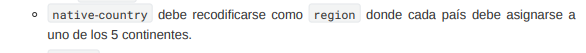

In [18]:
region = {
    "America": [
        "Outlying-US(Guam-USVI-etc)",
        "Trinadad&Tobago",
        "Ecuador",
        "Jamaica",
        "Nicaragua",
        "Honduras",
        "Canada",
        "United-States",
        "Peru",
        "Guatemala",
        "Mexico",
        "Dominican-Republic",
        "Haiti",
        "El-Salvador",
        "Puerto-Rico",
        "Columbia",
        "Cuba",
    ],
    "Africa": ["Congo"],
    "Europe": [
        "Holand-Netherlands",
        "France",
        "Greece",
        "Hungary",
        "Yugoslavia",
        "Scotland",
        "Ireland",
        "Germany",
        "Poland",
        "England",
        "Italy",
        "Portugal",
    ],
    "Asia": [
        "Hong",
        "Iran",
        "Philippines",
        "Thailand",
        "Vietnam",
        "South",
        "Japan",
        "India",
        "Cambodia",
        "Laos",
        "Taiwan",
        "China",
    ],
    "Oceania": ["Australia"],
}
for i in region:
    df.loc[df["native_country"].isin(region[i]), "region"] = i

df = df.drop("native_country", 1)

In [19]:
df["income"] = np.where(df["income"] == ">50K", 1, 0)

In [20]:
df.head()

age  fnlwgt  educational_num relationship   race  gender  capital_gain  \
0   25  226802                7    Own-child  Black    Male             0   
1   38   89814                9      Husband  White    Male             0   
2   28  336951               12      Husband  White    Male             0   
3   44  160323               10      Husband  Black    Male          7688   
4   18  103497               10    Own-child  White  Female             0   

   capital_loss  hours_per_week  income      collars  workclass_recod  \
0             0              40       0  blue-collar          Private   
1             0              50       0  blue-collar          Private   
2             0              40       1  blue-collar  state-level-gov   
3             0              40       1  blue-collar          Private   
4             0              30       0          NaN              NaN   

     educ_recod civstatus   region  
0   high-school    single  America  
1   high-school   married  America  
2       college   married  America  
3  Some-college   married  America  
4  Some-college    single  America

In [21]:
#### Separación de variables categóricas y continuas

In [22]:
categoricas = [
    "workclass_recod",
    "educ_recod",
    "educational_num",
    "civstatus",
    "relationship",
    "race",
    "gender",
    "income",
    "collars",
    "region",
]

continuas = ["age", "fnlwgt", "capital_gain", "capital_loss", "hours_per_week"]

In [23]:
#### Inspección visual del vector objetivo

In [24]:
def graficar_variables(df: pd.DataFrame, var: str, type=1) -> None:
    """
    Grafica una variable categórica de un DataFrame.
    Aparecerá un Gráfico de barras cuando estemos frente a una variable binaria o categórica.
    Parameters
    ----------
    :param df: DataFrame
    :param var: Se debe ingresar la columna a graficar
    :return : None
    -------
    Se grafica la columna indicada.
    """
    assert type != 1 or type != 0

    if type == 0:
        sns.countplot(df[var])
    else:
        try:
            sns.distplot(df[var])
        except Exception:
            plt.hist(df[var])
    plt.title(var)
    plt.tight_layout()

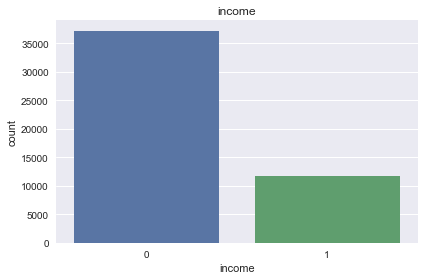

In [25]:
graficar_variables(df, "income", type=0)

In [26]:
def describe_vars(df: pd.DataFrame, variables: List):
    """
        Describe un listado de variables en un determinado
        dataframe
        :param df: pd.DataFrame
        :param variables: Listado de strings con los nombres de 
        las columnas
        :return: None
    """
    for i in continuas:
        print(f"\nVariable: {i}\n")
        print(df[i].describe())


describe_vars(df, continuas)
describe_vars(df, categoricas)


Variable: age

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Variable: fnlwgt

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

Variable: capital_gain

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

Variable: capital_loss

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

Variable: hours_per_week

count    48842.000000
mean        40.422382
std         12.

In [27]:
def chunkify(lst, n):
    """Crea una lista de lista para graficar mas facilmente"""
    for i in range(0, len(lst), n):
        yield lst[i : i + n]

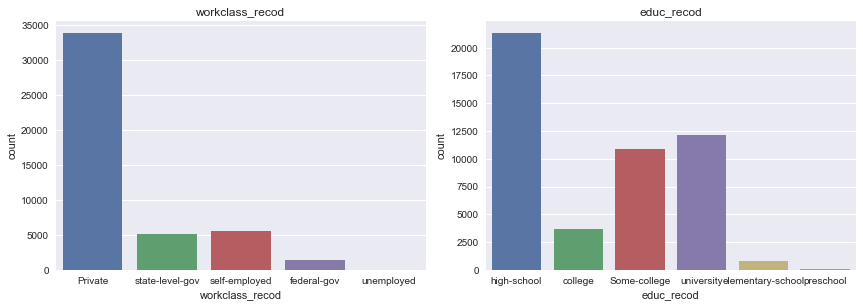

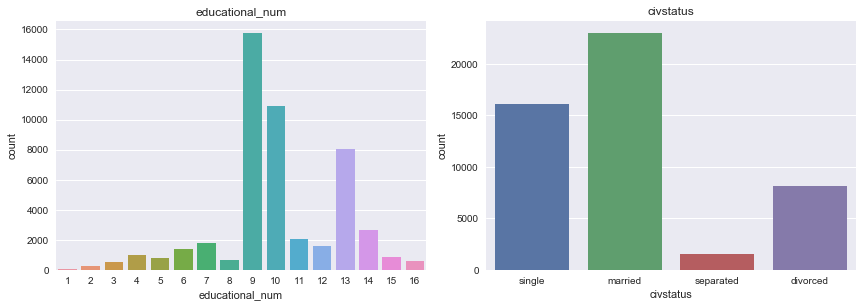

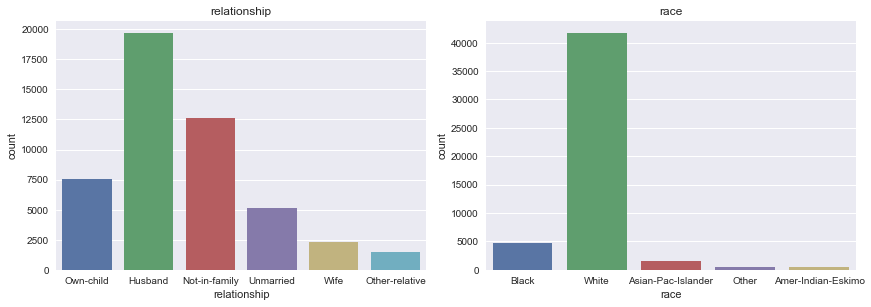

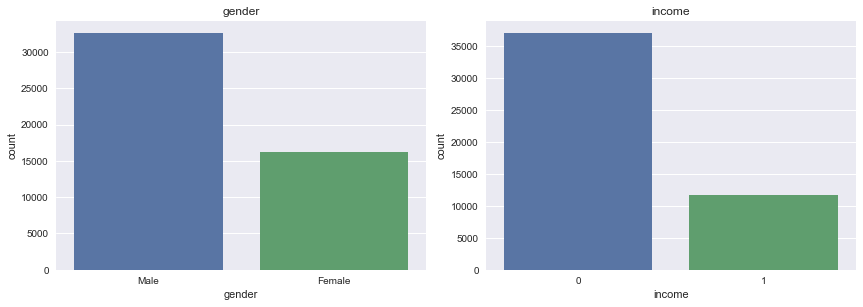

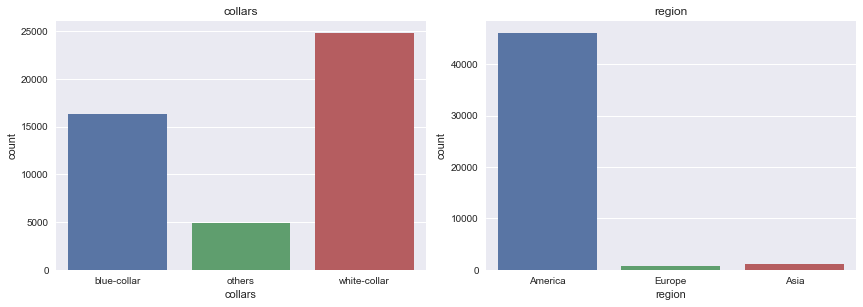

In [28]:
chunks = chunkify(categoricas, 2)

for chunk in chunks:
    fig = plt.figure(figsize=(30, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    for idx, var in enumerate(chunk, 1):
        ax = fig.add_subplot(3, 5, idx)
        graficar_variables(df, var, type=0)

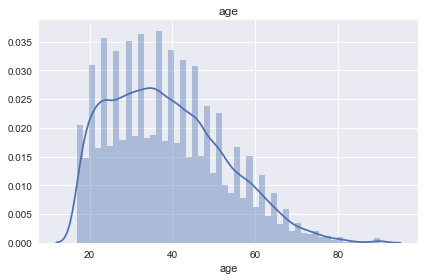

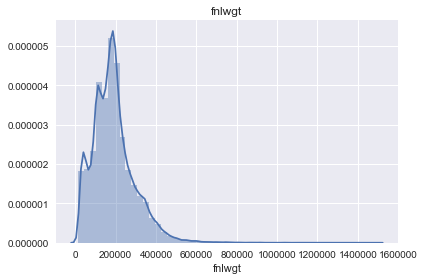

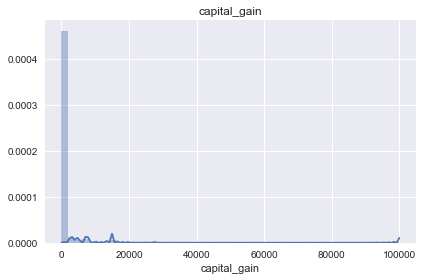

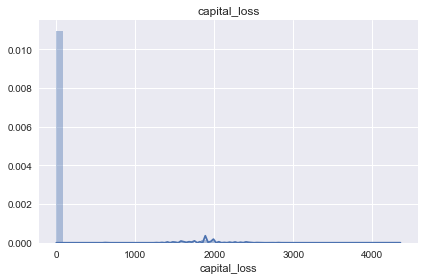

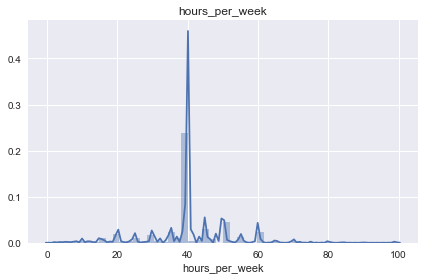

In [29]:
for idx, var in enumerate(continuas, 1):
    graficar_variables(df, var, type=1)
    plt.show()

#### Inspección de datos perdidos en las variables

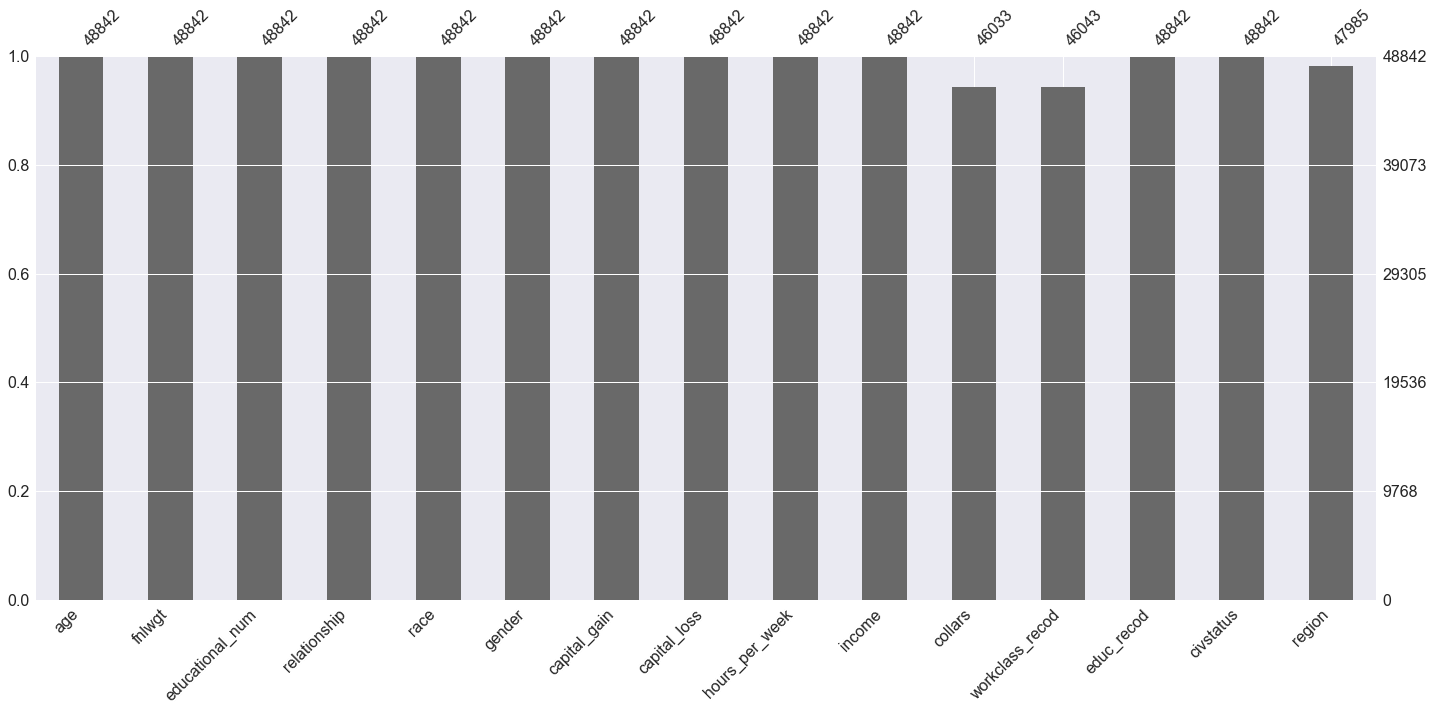

In [30]:
msgn.bar(df)

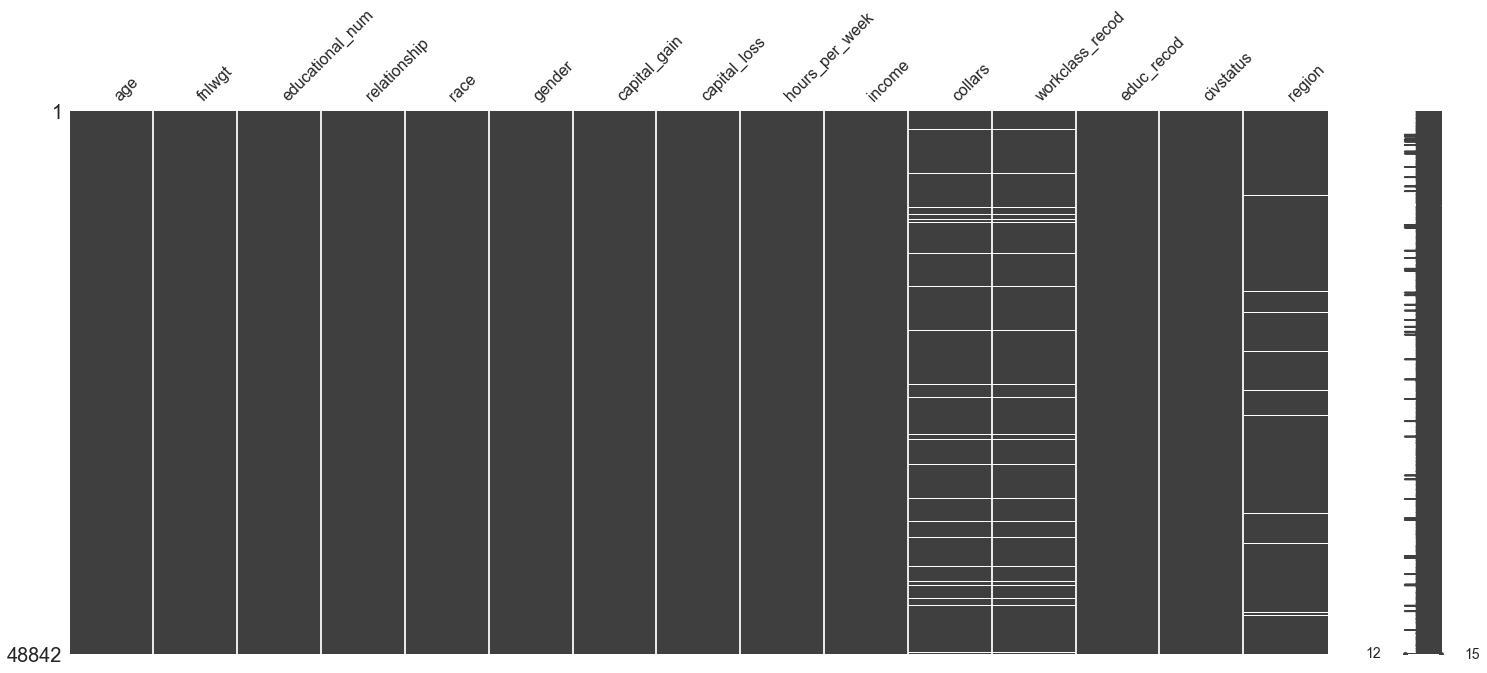

In [31]:
msgn.matrix(df)

In [32]:
missing_values_count = df.isnull().sum()
missing_values_count

age                   0
fnlwgt                0
educational_num       0
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
income                0
collars            2809
workclass_recod    2799
educ_recod            0
civstatus             0
region              857
dtype: int64

#### Análisis de porcentaje de datos perdidos en cada columna

In [33]:
missing_values_count / df.shape[0]

age                0.000000
fnlwgt             0.000000
educational_num    0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
income             0.000000
collars            0.057512
workclass_recod    0.057307
educ_recod         0.000000
civstatus          0.000000
region             0.017546
dtype: float64

In [34]:
df = df.dropna()

In [35]:
df.head()

age  fnlwgt  educational_num   relationship   race gender  capital_gain  \
0   25  226802                7      Own-child  Black   Male             0   
1   38   89814                9        Husband  White   Male             0   
2   28  336951               12        Husband  White   Male             0   
3   44  160323               10        Husband  Black   Male          7688   
5   34  198693                6  Not-in-family  White   Male             0   

   capital_loss  hours_per_week  income      collars  workclass_recod  \
0             0              40       0  blue-collar          Private   
1             0              50       0  blue-collar          Private   
2             0              40       1  blue-collar  state-level-gov   
3             0              40       1  blue-collar          Private   
5             0              30       0       others          Private   

     educ_recod civstatus   region  
0   high-school    single  America  
1   high-school   married  America  
2       college   married  America  
3  Some-college   married  America  
5   high-school    single  America

In [36]:
df.shape

(45222, 15)

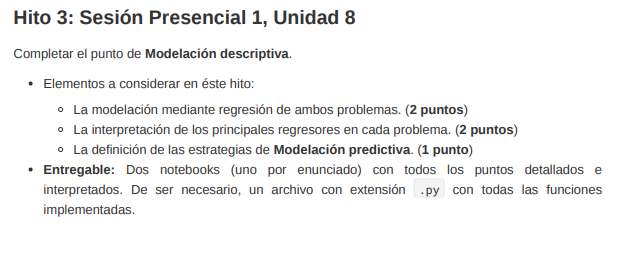

Comenzaremos aplicando un modelo de clasificación generalizado que contenga todas las variables que nos aporten en la probabilidad de obtener un uno en nuestro vector objetivo

$$log\left (  \frac{Pr(bin\_income=1)}{1-Pr(bin\_income=1)}\right ) =\beta _{0} + \sum_{j=1}^{N} \beta _{j} \cdot X$$



In [37]:
df.columns

Index(['age', 'fnlwgt', 'educational_num', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'income', 'collars',
       'workclass_recod', 'educ_recod', 'civstatus', 'region'],
      dtype='object')

In [38]:
df.head()

age  fnlwgt  educational_num   relationship   race gender  capital_gain  \
0   25  226802                7      Own-child  Black   Male             0   
1   38   89814                9        Husband  White   Male             0   
2   28  336951               12        Husband  White   Male             0   
3   44  160323               10        Husband  Black   Male          7688   
5   34  198693                6  Not-in-family  White   Male             0   

   capital_loss  hours_per_week  income      collars  workclass_recod  \
0             0              40       0  blue-collar          Private   
1             0              50       0  blue-collar          Private   
2             0              40       1  blue-collar  state-level-gov   
3             0              40       1  blue-collar          Private   
5             0              30       0       others          Private   

     educ_recod civstatus   region  
0   high-school    single  America  
1   high-school   married  America  
2       college   married  America  
3  Some-college   married  America  
5   high-school    single  America

In [39]:
categoricas

['workclass_recod',
 'educ_recod',
 'educational_num',
 'civstatus',
 'relationship',
 'race',
 'gender',
 'income',
 'collars',
 'region']

In [40]:
df2 = df.copy()
categoricals = list(filter(lambda x: x != "income", categoricas))
for column in categoricas:
    df2[column] = sm.tools.categorical(df2[column])
df2.head()

age  fnlwgt  educational_num relationship race gender  capital_gain  \
0   25  226802              0.0            0    0      0             0   
1   38   89814              0.0            1    0      0             0   
2   28  336951              0.0            1    0      0             0   
3   44  160323              0.0            1    0      0          7688   
5   34  198693              0.0            1    0      0             0   

   capital_loss  hours_per_week  income collars workclass_recod educ_recod  \
0             0              40     1.0       1               1          0   
1             0              50     1.0       1               1          0   
2             0              40     0.0       1               0          0   
3             0              40     0.0       1               1          1   
5             0              30     0.0       0               0          0   

  civstatus region  
0         0      1  
1         0      1  
2         0      1  
3         0      1  
5         0      1

In [41]:
_vars1 = df2.loc[:, "age":"hours_per_week"].columns
_vars2 = df2.loc[:, "collars":"region"].columns
saturated_model_vars = f"income ~ {' + '.join([*_vars1, *_vars2])}"
saturated_model_vars

'income ~ age + fnlwgt + educational_num + relationship + race + gender + capital_gain + capital_loss + hours_per_week + collars + workclass_recod + educ_recod + civstatus + region'

In [42]:
model1 = smf.logit(saturated_model_vars, df2).fit()

Optimization terminated successfully.
         Current function value: 0.450926
         Iterations 8


In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                41883
Model:                          Logit   Df Residuals:                    41868
Method:                           MLE   Df Model:                           14
Date:                Wed, 25 Mar 2020   Pseudo R-squ.:                  0.1944
Time:                        02:36:04   Log-Likelihood:                -18886.
converged:                       True   LL-Null:                       -23443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.6097      0.096     16.707      0.000       1.421       1.799
relationship[T.1.0]       -2.2110      0.040    -55.327      0.000      -2.289      -2.133
race[T.1.0]                0.7353      0.169      4.362      0.000       0.405       1.066
gender[T.1.0]              0.0429      0.044      0.967      0.333      -0.044       0.130
collars[T.1.0]             1.1902      0.029     40.587      0.000       1.133       1.248
workclass_recod[T.1.0]     0.2884      0.028     10.353      0.000       0.234       0.343
educ_recod[T.1.0]          0.2381      0.032      7.356      0.000       0.175       0.302
civstatus[T.1.0]           0.0684      0.048      1.432      0.152      -0.025       0.162
region[T.1.0]              0.0904      0.064      1.420      0.156      -0.034       0.215
age                       -0.0009      0.001     -0.887      0.375      -0.003       0.001
fnlwgt                  9.421e-08   1.22e-07      0.771      0.441   -1.45e-07    3.34e-07
educational_num            2.8427      1.025      2.774      0.006       0.834       4.851
capital_gain            8.207e-07   1.69e-06      0.486      0.627   -2.49e-06    4.13e-06
capital_loss           -5.146e-06   3.18e-05     -0.162      0.871   -6.75e-05    5.72e-05
hours_per_week            -0.0014      0.001     -1.304      0.192      -0.004       0.001
==========================================================================================
"""

In [44]:
#### Removemos variables no representativas que no me ayudan a testear mi hipotesis nulla

In [45]:
model2 = smf.logit(
    "income ~ relationship + race + collars + workclass_recod + educational_num", df2,
).fit()

Optimization terminated successfully.
         Current function value: 0.451703
         Iterations 8


In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                41883
Model:                          Logit   Df Residuals:                    41877
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Mar 2020   Pseudo R-squ.:                  0.1930
Time:                        02:36:04   Log-Likelihood:                -18919.
converged:                       True   LL-Null:                       -23443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.7244      0.030     58.242      0.000       1.666       1.782
relationship[T.1.0]       -2.2669      0.028    -80.676      0.000      -2.322      -2.212
race[T.1.0]                0.7624      0.169      4.509      0.000       0.431       1.094
collars[T.1.0]             1.1853      0.029     40.810      0.000       1.128       1.242
workclass_recod[T.1.0]     0.2901      0.028     10.436      0.000       0.236       0.345
educational_num            2.7874      1.025      2.719      0.007       0.778       4.797
==========================================================================================
"""